<a href="https://colab.research.google.com/github/AdityaKumbhar21/Machine_Learning/blob/main/Time_Series_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = yf.download('AAPL', start="2010-01-01", end="2010-12-31", interval="1d")

/tmp/ipython-input-2-1268452244.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start="2010-01-01", end="2010-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431894,6.446621,6.382906,6.414463,493729600
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800


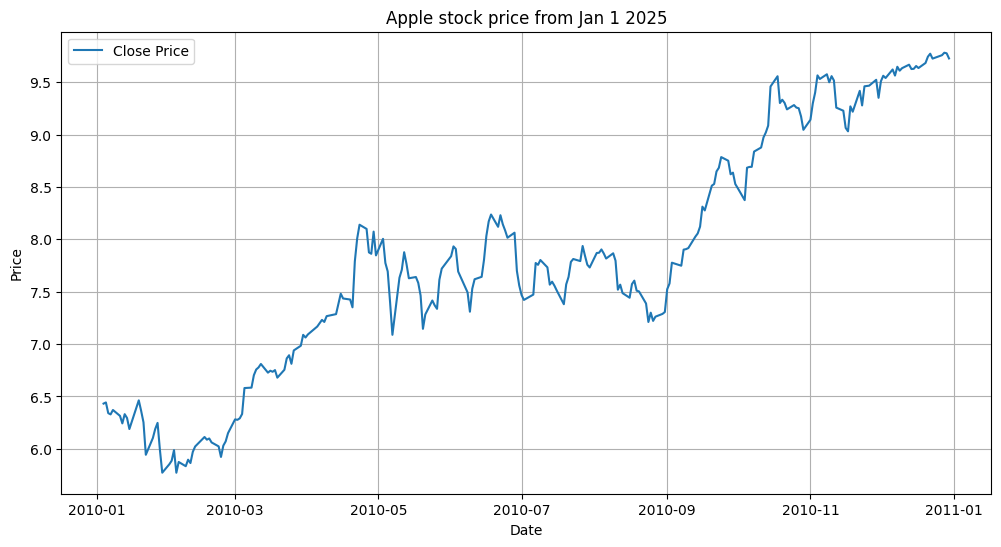

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple stock price from Jan 1 2025")
plt.legend()
plt.grid(True)
plt.show()


## Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


stock_decomposition = seasonal_decompose(data['Close'], model='additive', period = 20)
trend_additive = stock_decomposition.trend
seasonality_additive = stock_decomposition.seasonal
residual_additive = stock_decomposition.resid

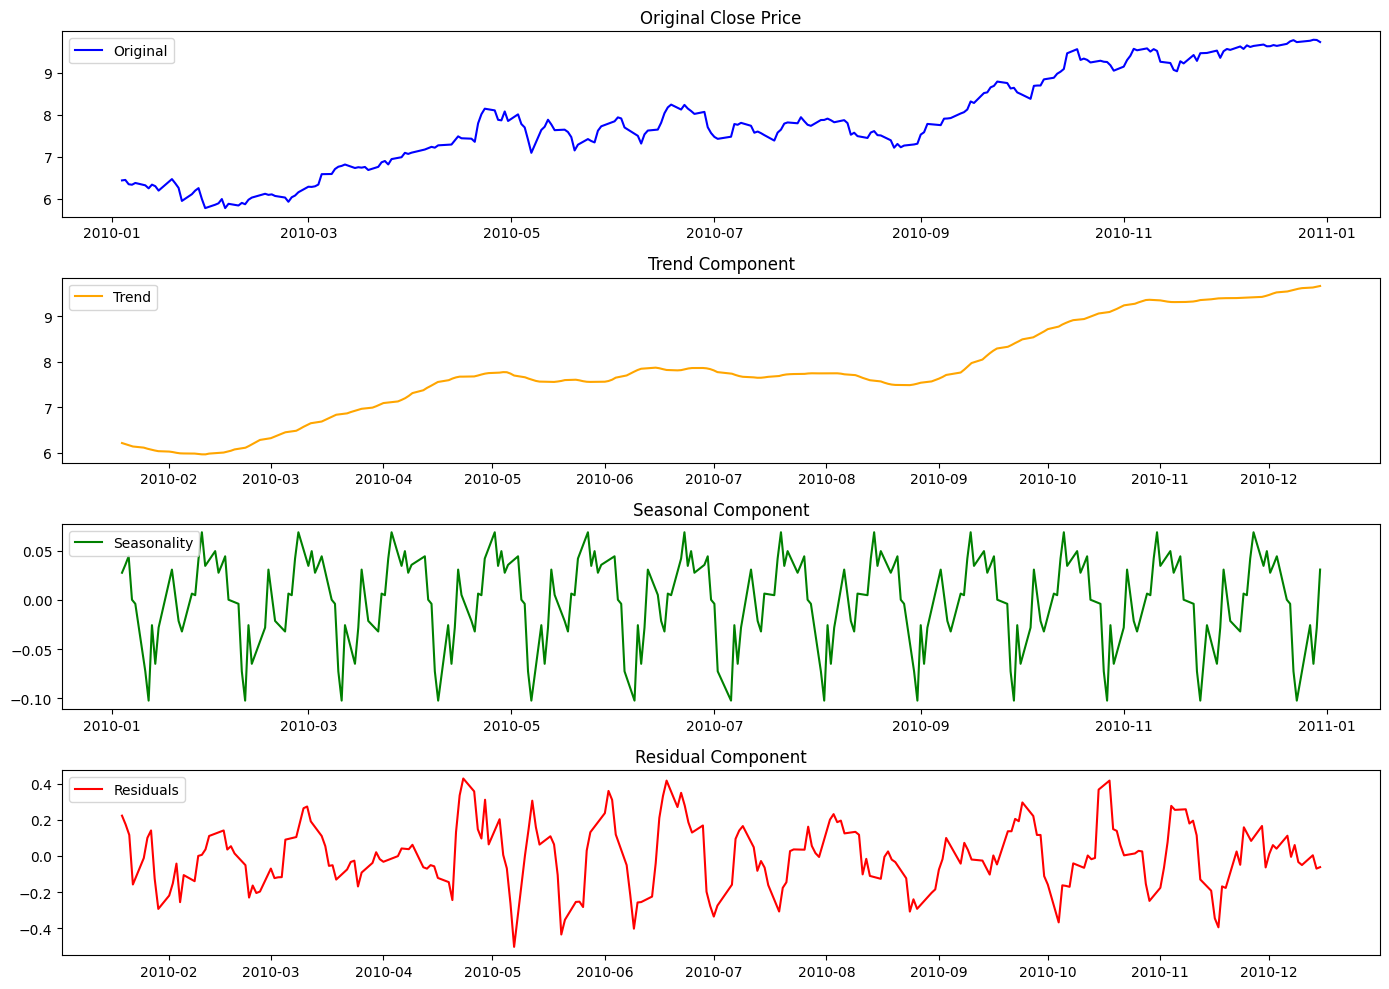

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Close Price')

plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonality_additive, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


## STL decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(data['Close'],period = 30)
results = stl.fit()

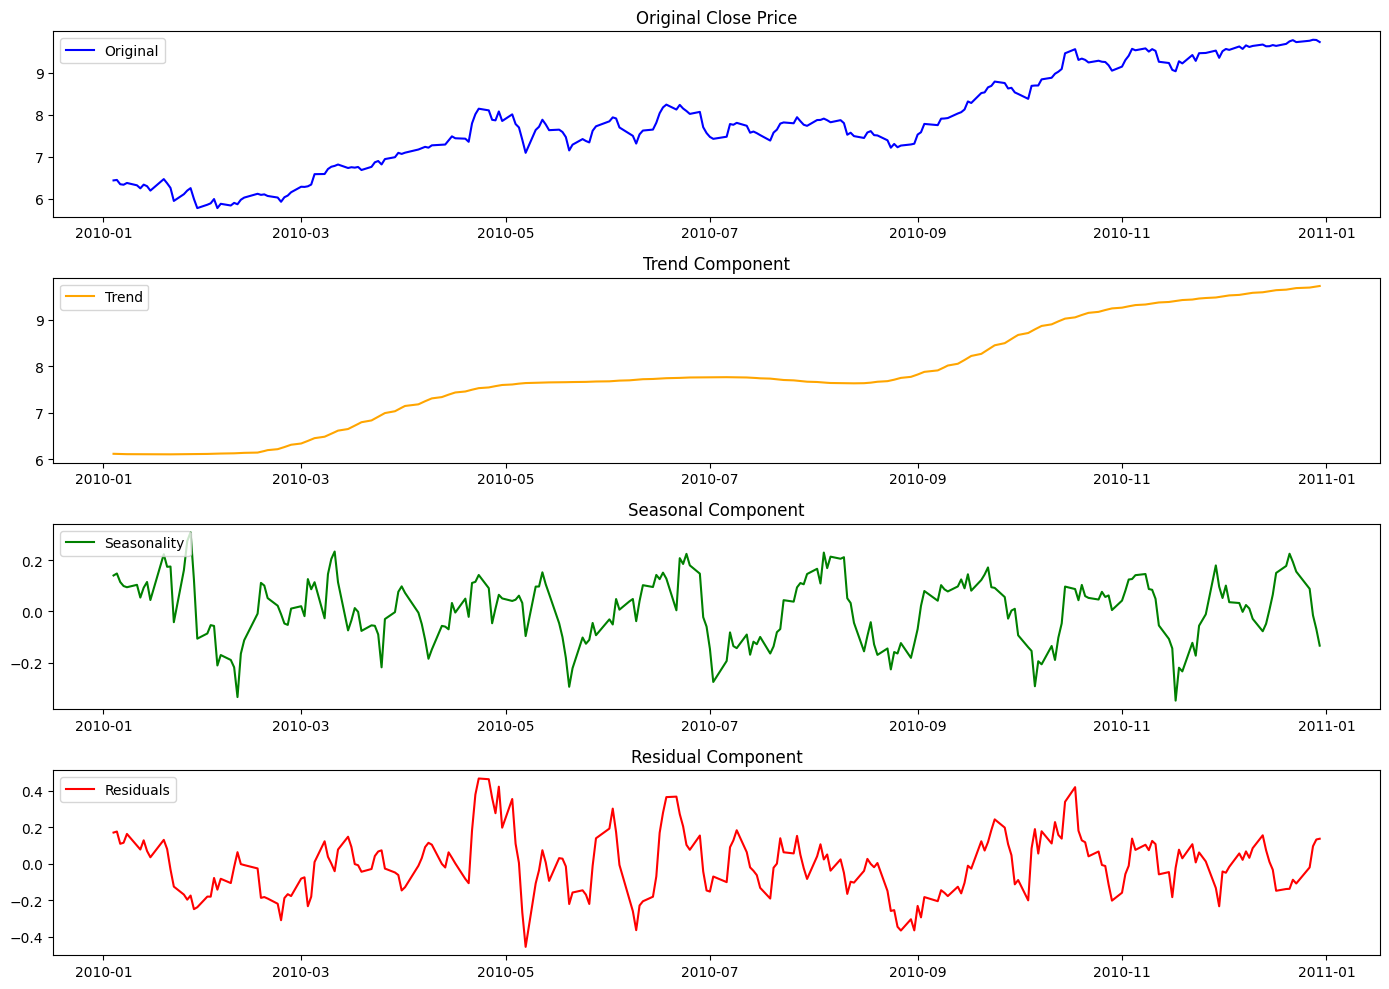

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(results.observed, label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Close Price')

plt.subplot(412)
plt.plot(results.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(results.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(results.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


## Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Close'])

print(f'ADF Statistic {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print(f'Critical Values: ')
for key, value in adf_test[4].items():
  print(f'  {key}: {round(value, 3)} ')

ADF Statistic -0.486
p-value: 0.895
Critical Values: 
  1%: -3.457 
  5%: -2.873 
  10%: -2.573 


Data is non-stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data['Close'])

print(f'KPSS Statistic {round(kpss_test[0],3)}')
print(f'p-value: {round(kpss_test[1],3)}')
print(f'Critical Values: ')
for key, value in kpss_test[3].items():
  print(f'  {key}: {round(value, 3)} ')

KPSS Statistic 2.059
p-value: 0.01
Critical Values: 
  10%: 0.347 
  5%: 0.463 
  2.5%: 0.574 
  1%: 0.739 


/tmp/ipython-input-10-2639861443.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data['Close'])


Data is non-stationary

## Converting non-stationary to stationary

In [ ]:
def adf_test(series):
  result = adfuller(series)

  print(f'ADF Statistic {round(result[0],3)}')
  print(f'p-value: {round(result[1],3)}')
  print(f'Critical Values: ')
  for key, value in result[4].items():
    print(f'  {key}: {round(value, 3)} ')

In [ ]:
prices = data['Close']

Using Differencing

In [ ]:
price_diff = prices.diff()

In [ ]:
adf_test(price_diff.dropna())

ADF Statistic -15.325
p-value: 0.0
Critical Values: 
  1%: -3.457 
  5%: -2.873 
  10%: -2.573 


In [ ]:
def decomposition(series):

  decomposition = seasonal_decompose(series, model='additive', period = 20)
  trend = stock_decomposition.trend
  seasonality = stock_decomposition.seasonal
  residual = stock_decomposition.resid
  plt.figure(figsize=(14, 10))

  plt.subplot(411)
  plt.plot(series, label='Original', color='blue')
  plt.legend(loc='upper left')
  plt.title('Original Close Price')

  plt.subplot(412)
  plt.plot(trend, label='Trend', color='orange')
  plt.legend(loc='upper left')
  plt.title('Trend Component')

  plt.subplot(413)
  plt.plot(seasonality, label='Seasonality', color='green')
  plt.legend(loc='upper left')
  plt.title('Seasonal Component')

  plt.subplot(414)
  plt.plot(residual, label='Residuals', color='red')
  plt.legend(loc='upper left')
  plt.title('Residual Component')

  plt.tight_layout()
  plt.show()

Transformation

In [ ]:
price_log = np.log(prices)

In [ ]:
adf_test(price_log)

ADF Statistic -0.655
p-value: 0.858
Critical Values: 
  1%: -3.457 
  5%: -2.873 
  10%: -2.573 


## Model Training

### AR Model

RMSE: 0.1024


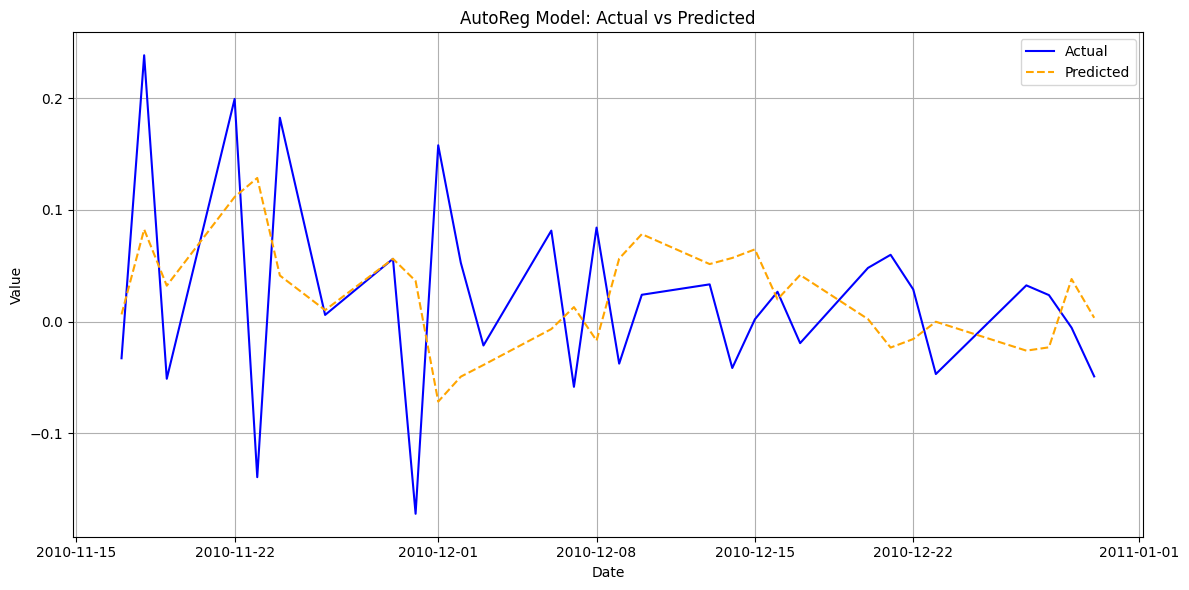

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')


stationary_data = price_diff.dropna()


train_data, test_data = stationary_data[:-30], stationary_data[-30:]

model = AutoReg(train_data, lags=30)
model_fit = model.fit()


predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title("AutoReg Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## MA Model using ARIMA keeping other two params as 0

RMSE: 0.1110


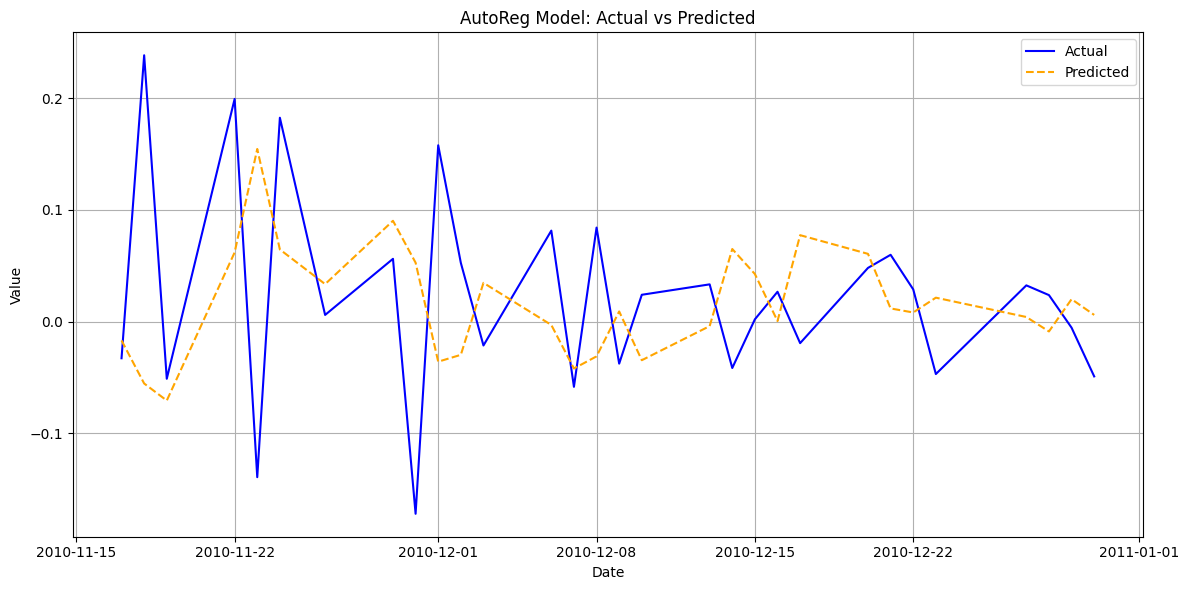

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train_data,order=(0,0,30))
model_fit = model_arima.fit()


predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title("MA Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ARMA Model

RMSE: 0.0914


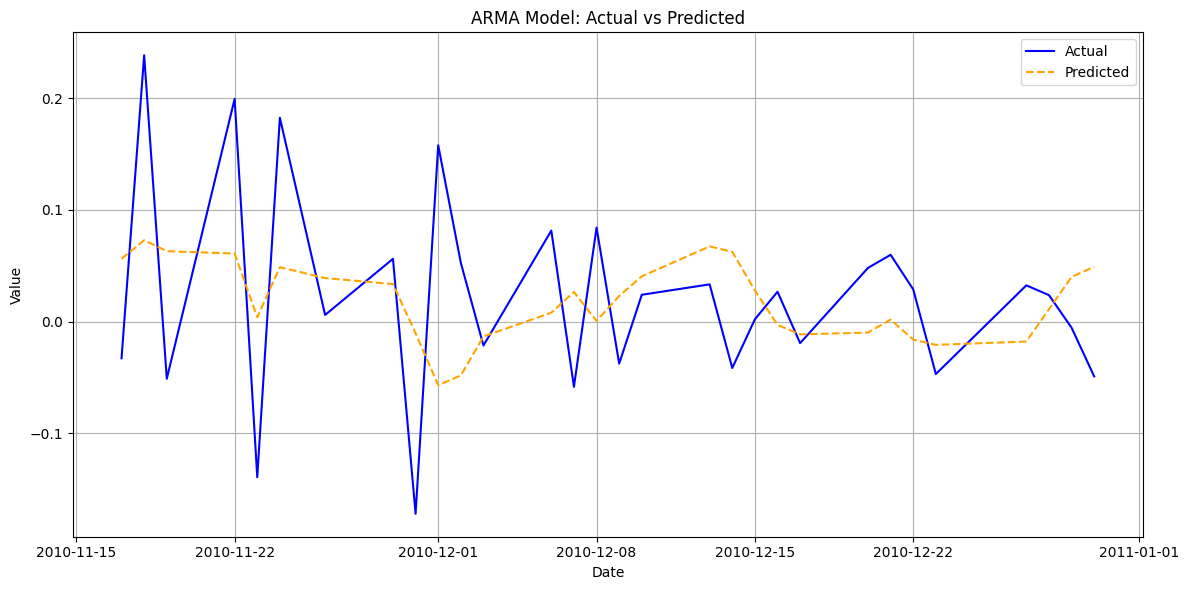

In [ ]:
model_arma = ARIMA(train_data,order=(10,0,10))
model_fit = model_arma.fit()


predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title("ARMA Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ARIMA

RMSE: 0.0993


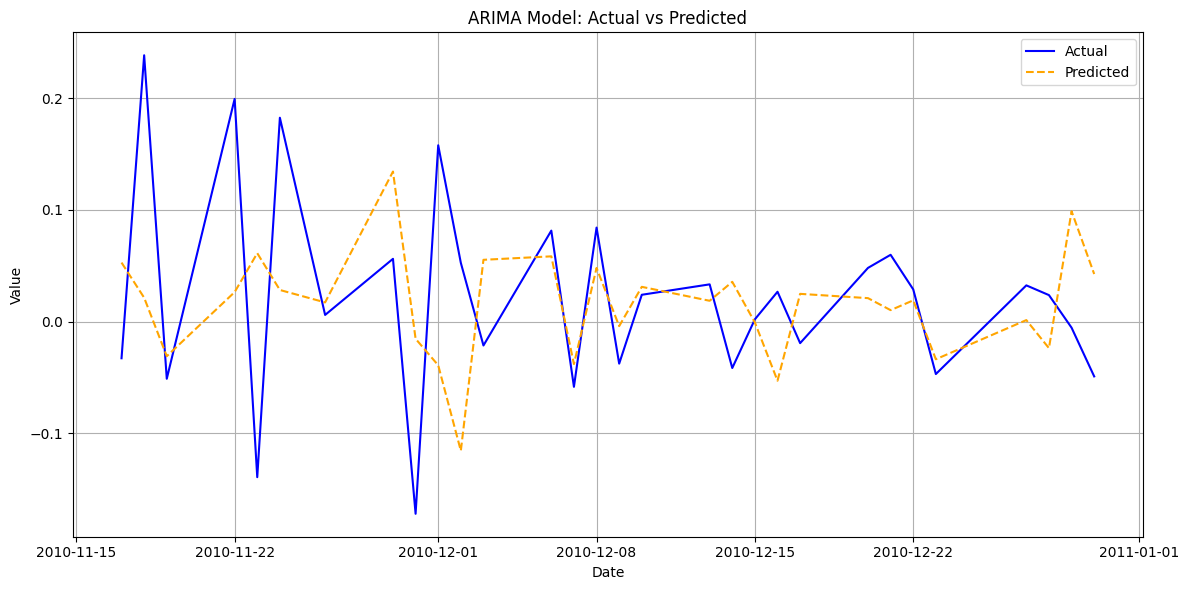

In [ ]:
model_arima = ARIMA(train_data,order=(24,1,24))
model_fit = model_arima.fit()


predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title("ARIMA Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### SARIMA Model

RMSE: 0.0804


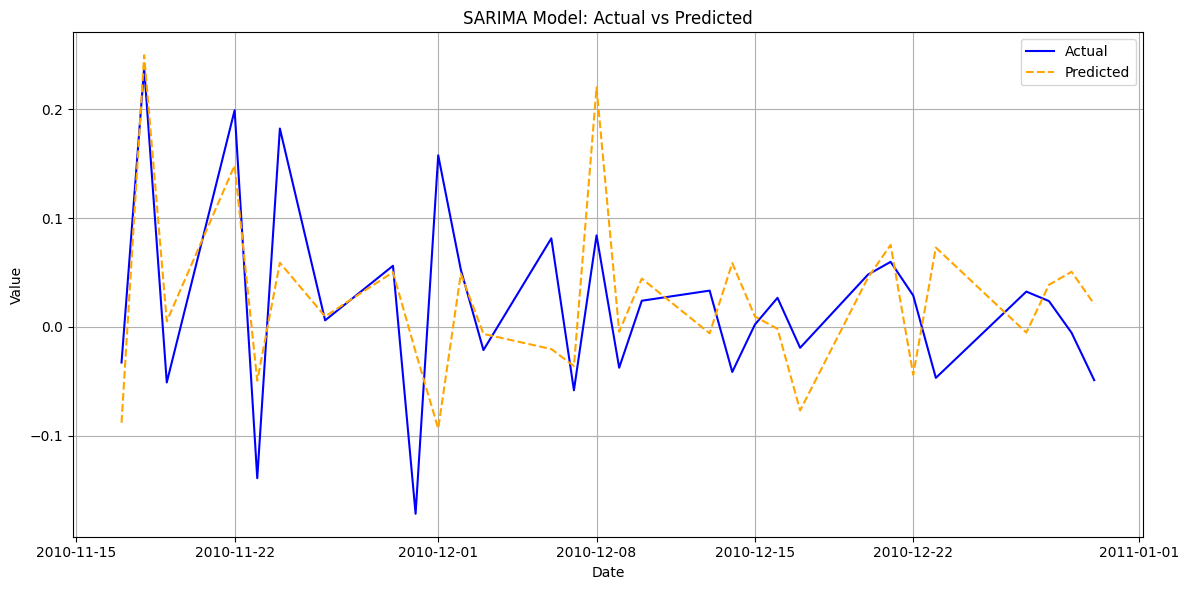

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p,d,q = 7,1,7
P,D,Q,s = 1,1,1,45

model_sarima = SARIMAX(train_data,order=(p,d,q), seasonal_order=(P,D,Q,s))
model_fit = model_sarima.fit()

predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title("SARIMA Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Moving Average

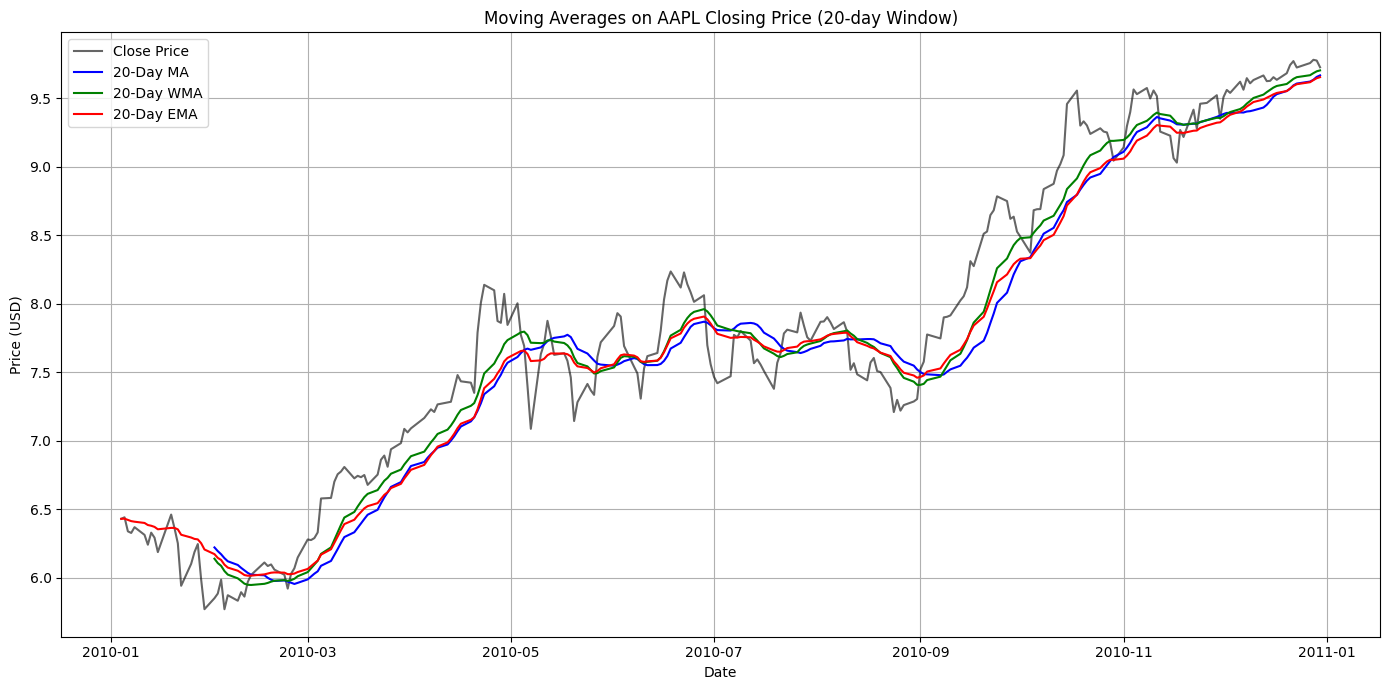

In [ ]:
window_size = 20
data['MA'] = data['Close'].rolling(window=window_size).mean()

# Weighted Moving Average (WMA) - fix typo: np.arange
weights = np.arange(1, window_size + 1)
data['WMA'] = data['Close'].rolling(window=window_size).apply(
    lambda prices: np.dot(prices, weights)/weights.sum(),
    raw=True
)

# Exponential Moving Average (EMA)
data['EMA'] = data['Close'].ewm(span=window_size, adjust=False).mean()

# Plot Close and all moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data['MA'], label=f'{window_size}-Day MA', color='blue')
plt.plot(data['WMA'], label=f'{window_size}-Day WMA', color='green')
plt.plot(data['EMA'], label=f'{window_size}-Day EMA', color='red')

plt.title(f'Moving Averages on AAPL Closing Price ({window_size}-day Window)')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

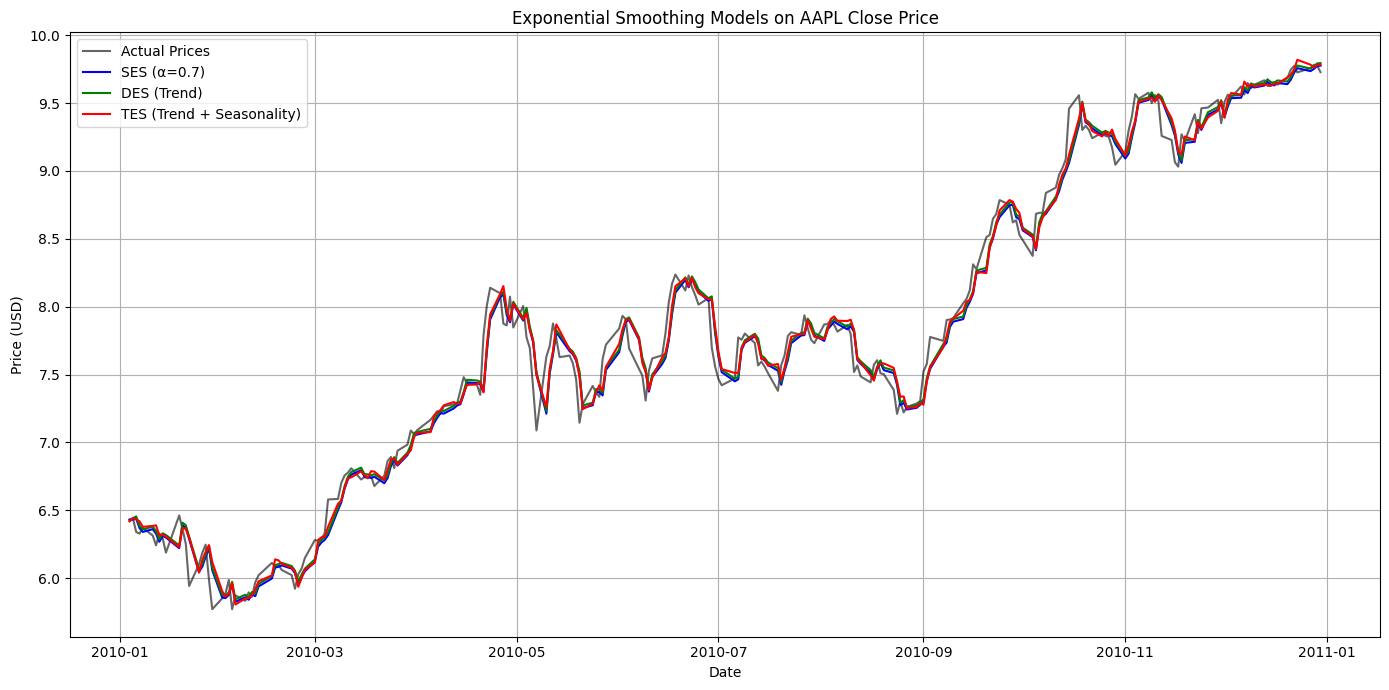

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
ses_model = SimpleExpSmoothing(prices).fit(smoothing_level=0.7)
ses_pred = ses_model.fittedvalues

# Fit DES (Double Exponential Smoothing with trend)
des_model = ExponentialSmoothing(prices, trend='add').fit(smoothing_level=0.7)
des_pred = des_model.fittedvalues

# Fit TES (Triple Exponential Smoothing with trend + seasonality)
tes_model = ExponentialSmoothing(prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
tes_pred = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(prices, label='Actual Prices', color='black', alpha=0.6)
plt.plot(ses_pred, label='SES (α=0.7)', color='blue')
plt.plot(des_pred, label='DES (Trend)', color='green')
plt.plot(tes_pred, label='TES (Trend + Seasonality)', color='red')

plt.title("Exponential Smoothing Models on AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## ACF and PACF

Text(0.5, 1.0, 'PACF Plot')

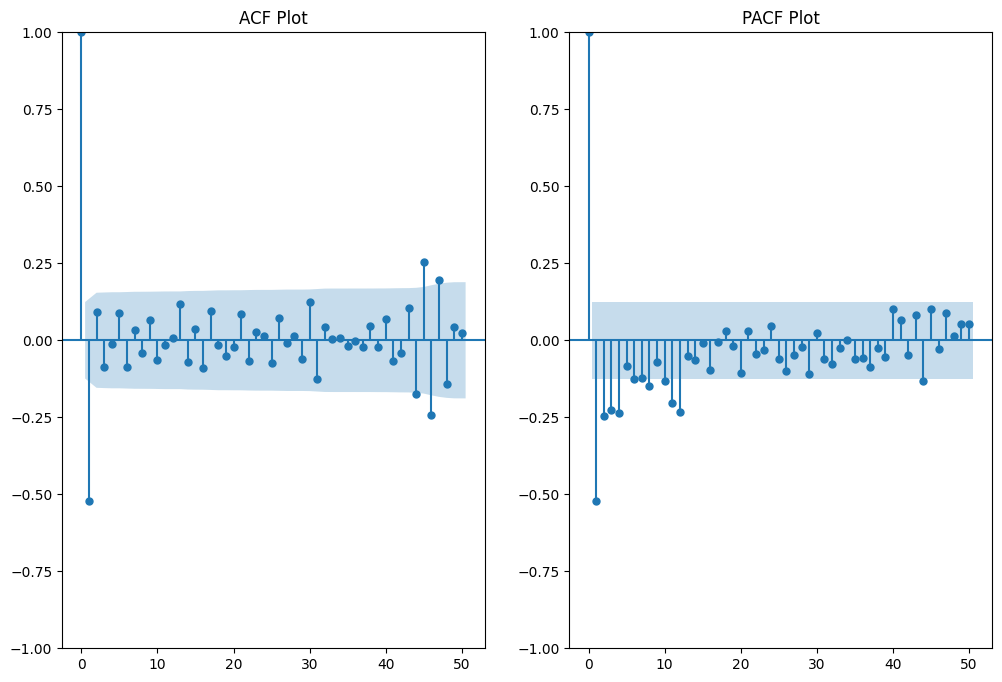

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plot_acf(data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title("ACF Plot")

plt.subplot(1,2,2)
plot_pacf(data['Close'].diff().diff().dropna(),ax=plt.gca(),lags=50)
plt.title("PACF Plot")

This is ARMIA of p = 1, q = 11,12